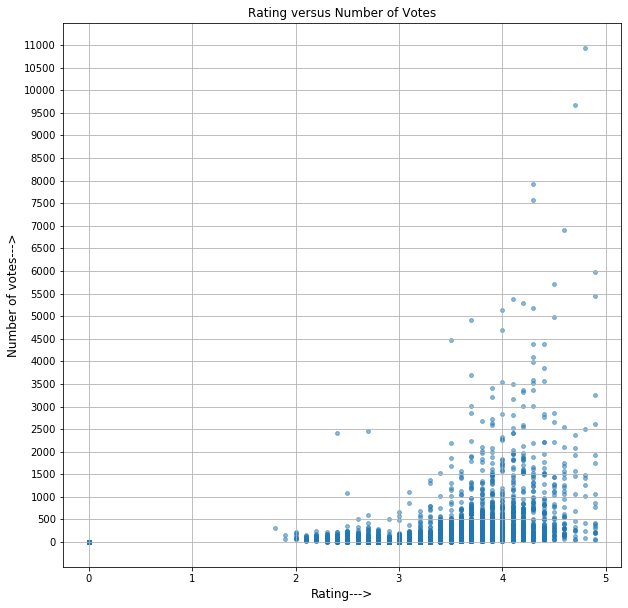

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("zomato.csv",encoding = "ISO 8859-1")
df = df[df['Country Code'] == 1]
new_df = df.copy()
votes = [i for i in df.Votes]
ratings = [i for i in df['Aggregate rating']]

plt.figure(figsize=(10,10))
plt.scatter(ratings,votes,s = 15,alpha = 0.5)
plt.grid()

plt.yticks(np.arange(0,11200,500))
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.show()

Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the voes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

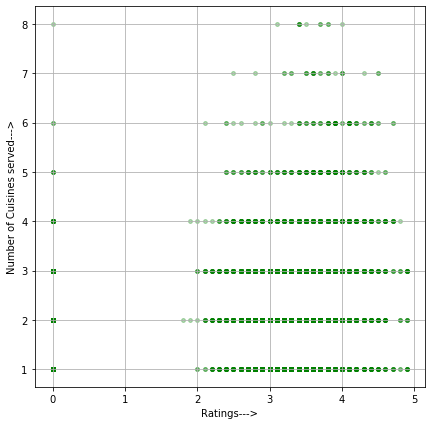

In [2]:
new_df = df.copy()
new_df=new_df.loc[df.Cuisines.notnull()]
cuisines = [len(i.split(',')) for i in new_df.Cuisines]
rating=[i for i in new_df['Aggregate rating']]
plt.figure(figsize=(7, 7))
plt.scatter(rating, cuisines, c='green', s=15, alpha=0.3)
plt.xlabel('Ratings--->')
plt.ylabel('Number of Cuisines served--->')
plt.grid()
plt.show()

From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

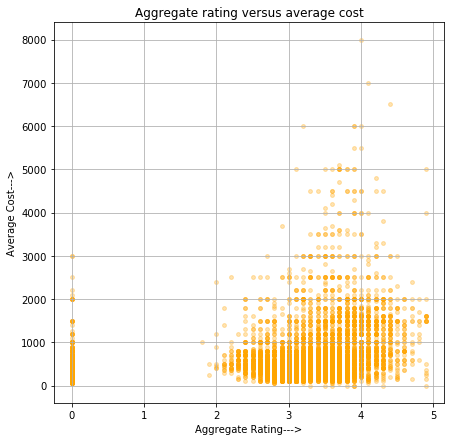

In [3]:
plt.figure(figsize=(7, 7))

#plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange',alpha = 0.3)
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

we can see that when the average cost goes higher than 3000 the rating is generally between 4 and 5, and ofcourse it sholud be like that only, because when the average cost is too high itself, the food quality should also be at its peak. As the average cost goes in between 2000 to 3000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 0 to 2000, the rating varies from 2 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4.

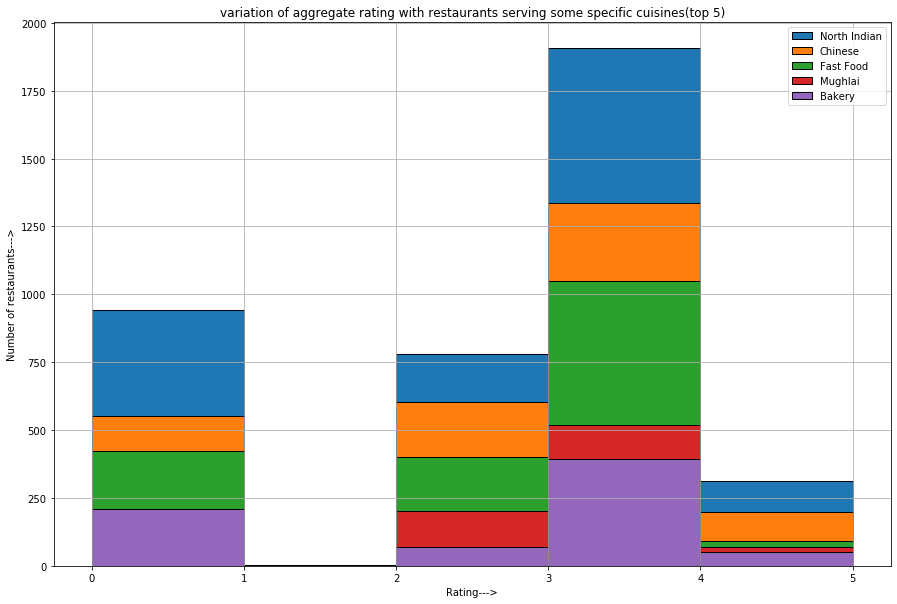

In [4]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]
plt.figure(figsize=(15, 10))
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
   
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

In [5]:
df = pd.read_csv("zomato.csv",encoding = "ISO 8859-1")
df = df[df['Country Code'] == 1]

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        #here i have just applied the complete formula to calculate Weighted restaurant rating  in each locality
        #here i is the locality name and this leanthy term is the formula for calculating  WRR.
        #sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0] here [0] at the last is used because the result i will get from sum((np_votes*np_rating)[np.argwhere(np_locality==i)]) is an array with one number. thats why i have indexed it to get that number.
        #same is the case with sum(np_votes[np.argwhere(np_locality==i)])[0]
np_local=np.array([i for i in dic.keys()])#numpy array of locality
np_wrr=np.array([i for i in dic.values()])#weighted restaurant rating
np_local=np_local[np.argsort(np_wrr)][::-1]#arranged in descending order
np_wrr=np.sort(np_wrr)[::-1]#arranged in desceding order


print("****TOP 10****\n")
for i in range(0,10):
    print(np_local[i], "----->", "{:.2f}".format(np_wrr[i]))

print()
print("****ALL****\n")
for i in range(len(np_wrr)):
    print(np_local[i], "----->", "{:.2f}".format(np_wrr[i]))



****TOP 10****

Hotel Clarks Amer, Malviya Nagar -----> 4.90
Aminabad -----> 4.90
Friends Colony -----> 4.89
Powai -----> 4.84
Kirlampudi Layout -----> 4.82
Deccan Gymkhana -----> 4.80
Express Avenue Mall,  Royapettah -----> 4.80
Banjara Hills -----> 4.72
Sector 5, Salt Lake -----> 4.71
Riverside Mall, Gomti Nagar -----> 4.70

****ALL****

Hotel Clarks Amer, Malviya Nagar -----> 4.90
Aminabad -----> 4.90
Friends Colony -----> 4.89
Powai -----> 4.84
Kirlampudi Layout -----> 4.82
Deccan Gymkhana -----> 4.80
Express Avenue Mall,  Royapettah -----> 4.80
Banjara Hills -----> 4.72
Sector 5, Salt Lake -----> 4.71
Riverside Mall, Gomti Nagar -----> 4.70
Jubilee Hills -----> 4.62
Borivali West -----> 4.60
Chittoor Road -----> 4.60
New BEL Road -----> 4.60
Shastri Nagar -----> 4.60
Cavelossim -----> 4.60
Gandhipuram -----> 4.60
Kidderpore -----> 4.60
JP Nagar -----> 4.60
Sainikpuri -----> 4.60
CMR Central Mall, Maddilapalem -----> 4.60
Arambol -----> 4.60
Kilpauk -----> 4.60
Marathahalli -----> 

[<selenium.webdriver.remote.webelement.WebElement (session="23a8fc074032df6ca50d2335b7dda815", element="c14f46e3-8d58-4571-939a-ff3317ed1e4b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="23a8fc074032df6ca50d2335b7dda815", element="86d2d799-9812-4989-a1c1-b80006a69282")>,
 <selenium.webdriver.remote.webelement.WebElement (session="23a8fc074032df6ca50d2335b7dda815", element="76059419-5788-41e6-a4fe-2db884e7e04c")>]